In [2]:
import pandas as pd

# Load the Park National dataset
park_national_data = pd.read_csv('/Users/kazinafis/Downloads/Park National.csv')

# Convert any necessary columns to the correct dtype, such as dates, and ensure numerical columns are clean and ready for analysis
# Assuming 'DATE' needs to be converted to datetime if it exists
park_national_data['DATE'] = pd.to_datetime(park_national_data['DATE'])

# Select relevant features assuming the dataset structure is similar to the previous ones
selected_features_park = [
    'Real.GDP.growth', 'Unemployment.rate', 'CPI.inflation.rate', 
    'Mortgage.rate', 'BBB.corporate.yield', 'DRLNLS'
]
park_national_selected = park_national_data[selected_features_park]

# Check for missing values
missing_values_park = park_national_selected.isnull().sum()
print(park_national_selected.head())
print(missing_values_park)


   Real.GDP.growth  Unemployment.rate  CPI.inflation.rate  Mortgage.rate  \
0              1.5                3.7                 2.8            7.3   
1              4.9                3.7                 3.6            7.0   
2              2.1                3.6                 2.7            6.5   
3              2.2                3.5                 3.8            6.4   
4              2.6                3.6                 4.2            6.7   

   BBB.corporate.yield  DRLNLS  
0                  6.2   10853  
1                  6.0    7207  
2                  5.7    4918  
3                  5.6    2234  
4                  6.1    9012  
Real.GDP.growth        0
Unemployment.rate      0
CPI.inflation.rate     0
Mortgage.rate          0
BBB.corporate.yield    0
DRLNLS                 0
dtype: int64


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare the features and target variable
X_park = park_national_selected.drop('DRLNLS', axis=1)
y_park = park_national_selected['DRLNLS']

# Split the data
X_train_park, X_test_park, y_train_park, y_test_park = train_test_split(X_park, y_park, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression and Random Forest models
linear_model_park = LinearRegression()
linear_model_park.fit(X_train_park, y_train_park)

rf_model_park = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_park.fit(X_train_park, y_train_park)


RandomForestRegressor(random_state=42)

In [4]:
from sklearn.model_selection import cross_val_score

# Evaluate models using cross-validation
cv_scores_park_rf = cross_val_score(rf_model_park, X_park, y_park, cv=5, scoring='neg_mean_squared_error')
cv_scores_park_rf_mean = -cv_scores_park_rf.mean()

print("CV MSE for Random Forest:", cv_scores_park_rf_mean)


CV MSE for Random Forest: 74738968.7319508


In [5]:
# Evaluate the models on the test set
y_pred_linear_park = linear_model_park.predict(X_test_park)
mse_linear_park = mean_squared_error(y_test_park, y_pred_linear_park)

y_pred_rf_park = rf_model_park.predict(X_test_park)
mse_rf_park = mean_squared_error(y_test_park, y_pred_rf_park)

print("Test MSE for Linear Regression:", mse_linear_park)
print("Test MSE for Random Forest:", mse_rf_park)


Test MSE for Linear Regression: 31537920.222009134
Test MSE for Random Forest: 46008882.771342866


In [8]:
# Load the Supervisory Adverse Scenario Data
supervisory_data = pd.read_csv('/Users/kazinafis/Downloads/2024-Table_4A_Supervisory_Severely_Adverse_Domestic.csv')

# Display the first few rows and the columns to understand its structure
print(supervisory_data.head())
print(supervisory_data.columns)

# Assuming the data contains similar economic indicators as before, format and select them
supervisory_features = supervisory_data[['Real GDP growth', 'Unemployment rate', 'CPI inflation rate', 'Mortgage rate', 'BBB corporate yield']]

# It's possible you might need to rename columns to match the model's expected input:
supervisory_features.columns = ['Real.GDP.growth', 'Unemployment.rate', 'CPI.inflation.rate', 'Mortgage.rate', 'BBB.corporate.yield']

# Check if there's any need for additional preprocessing like filling missing values
print(supervisory_features.isnull().sum())




                  Scenario Name     Date  Real GDP growth  Nominal GDP growth  \
0  Supervisory Severely Adverse  2024 Q1            -11.6                -9.9   
1  Supervisory Severely Adverse  2024 Q2             -6.7                -5.7   
2  Supervisory Severely Adverse  2024 Q3             -8.0                -7.1   
3  Supervisory Severely Adverse  2024 Q4             -5.9                -5.1   
4  Supervisory Severely Adverse  2025 Q1             -1.8                -0.7   

   Real disposable income growth  Nominal disposable income growth  \
0                           -7.8                              -6.0   
1                           -4.0                              -2.8   
2                           -4.2                              -3.2   
3                           -2.9                              -1.8   
4                           -0.1                               1.1   

   Unemployment rate  CPI inflation rate  3-month Treasury rate  \
0                5.6     

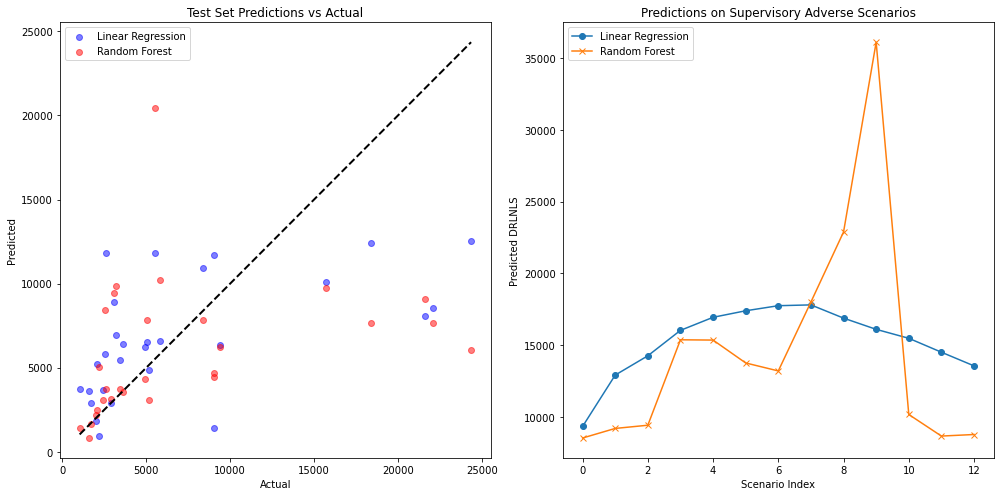

In [9]:

import matplotlib.pyplot as plt

# Plotting test set predictions vs actual values
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(y_test_park, y_pred_linear_park, color='blue', alpha=0.5, label='Linear Regression')
plt.scatter(y_test_park, y_pred_rf_park, color='red', alpha=0.5, label='Random Forest')
plt.plot([y_test_park.min(), y_test_park.max()], [y_test_park.min(), y_test_park.max()], 'k--', lw=2)
plt.title('Test Set Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()

# Assuming supervisory_data is loaded and prepared similarly
supervisory_features = supervisory_data[['Real GDP growth', 'Unemployment rate', 'CPI inflation rate', 'Mortgage rate', 'BBB corporate yield']]
predictions_supervisory_rf = rf_model_park.predict(supervisory_features)
predictions_supervisory_linear = linear_model_park.predict(supervisory_features)

plt.subplot(1, 2, 2)
plt.plot(predictions_supervisory_linear, label='Linear Regression', marker='o')
plt.plot(predictions_supervisory_rf, label='Random Forest', marker='x')
plt.title('Predictions on Supervisory Adverse Scenarios')
plt.xlabel('Scenario Index')
plt.ylabel('Predicted DRLNLS')
plt.legend()

plt.tight_layout()
plt.show()


In [10]:
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV

# Define alphas for the RidgeCV and LassoCV to search over
alphas = [0.1, 1, 10, 100, 1000]

# For ElasticNetCV, in addition to alphas, define a range of l1_ratios to test
l1_ratios = [0.1, 0.5, 0.9]

# Initialize cross-validated ridge regression
ridge_cv = RidgeCV(alphas=alphas, cv=5)

# Initialize cross-validated lasso regression
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)

# Initialize cross-validated elastic net regression
elasticnet_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5, random_state=42)

# Fit the models
ridge_cv.fit(X_train_park, y_train_park)
lasso_cv.fit(X_train_park, y_train_park)
elasticnet_cv.fit(X_train_park, y_train_park)

# Evaluate the models using the test set
y_pred_ridge = ridge_cv.predict(X_test_park)
y_pred_lasso = lasso_cv.predict(X_test_park)
y_pred_elasticnet = elasticnet_cv.predict(X_test_park)

mse_ridge = mean_squared_error(y_test_park, y_pred_ridge)
mse_lasso = mean_squared_error(y_test_park, y_pred_lasso)
mse_elasticnet = mean_squared_error(y_test_park, y_pred_elasticnet)

print(f"Ridge Regression MSE: {mse_ridge}")
print(f"Lasso Regression MSE: {mse_lasso}")
print(f"Elastic Net Regression MSE: {mse_elasticnet}")


Ridge Regression MSE: 38596573.54886991
Lasso Regression MSE: 32654898.36504715
Elastic Net Regression MSE: 36743394.4066155


In [12]:
from sklearn.utils import resample

# Define features if not already defined
features = X_train_park.columns

# Initialize a dictionary to hold the frequency of features being selected
feature_selection_frequency = {feature: 0 for feature in features}

# Define the number of bootstrap samples to use
n_bootstraps = 100

# Perform bootstrapped Lasso regression
for i in range(n_bootstraps):
    # Create a bootstrap sample
    X_resample, y_resample = resample(X_train_park, y_train_park, replace=True, random_state=i)
    
    # Fit Lasso
    lasso_bootstrap = LassoCV(alphas=alphas, cv=5, random_state=42+i)
    lasso_bootstrap.fit(X_resample, y_resample)
    
    # Update feature selection frequency
    for feature, coef in zip(features, lasso_bootstrap.coef_):
        if coef != 0:
            feature_selection_frequency[feature] += 1

# Sort features by selection frequency
sorted_features = sorted(feature_selection_frequency.items(), key=lambda x: x[1], reverse=True)

print("Feature selection frequency over bootstrapped samples:")
for feature, frequency in sorted_features:
    print(f"{feature}: {frequency}/{n_bootstraps}")


Feature selection frequency over bootstrapped samples:
Mortgage.rate: 100/100
Unemployment.rate: 98/100
Real.GDP.growth: 84/100
CPI.inflation.rate: 53/100
BBB.corporate.yield: 37/100


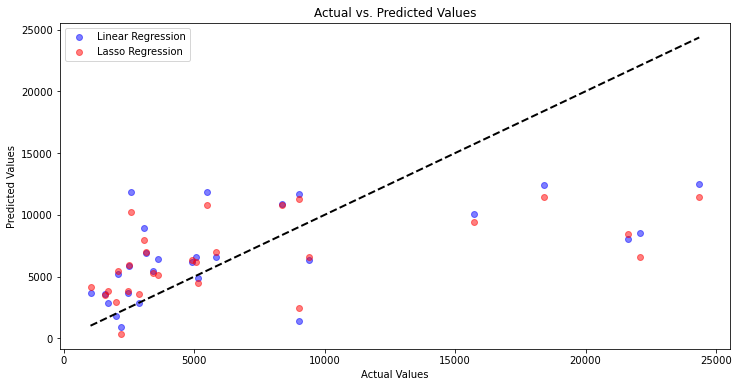

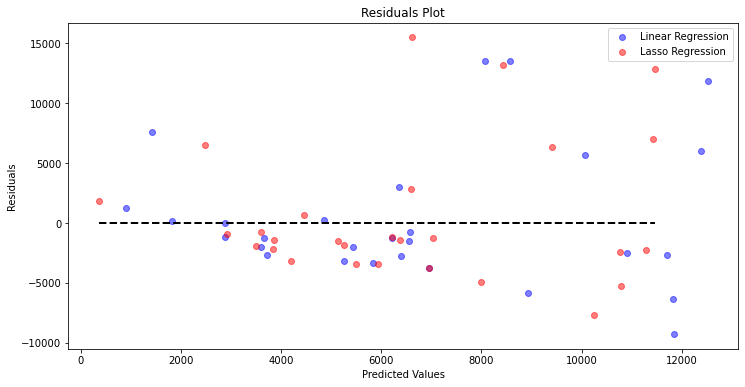

In [13]:
import matplotlib.pyplot as plt

# Actual vs. Predicted Plot
plt.figure(figsize=(12, 6))

# Linear Regression Predictions
plt.scatter(y_test_park, y_pred_linear_park, alpha=0.5, label='Linear Regression', color='blue')

# Lasso Regression Predictions
plt.scatter(y_test_park, y_pred_lasso, alpha=0.5, label='Lasso Regression', color='red')

plt.plot([y_test_park.min(), y_test_park.max()], [y_test_park.min(), y_test_park.max()], 'k--', lw=2)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Residuals Plot
plt.figure(figsize=(12, 6))

# Linear Regression Residuals
plt.scatter(y_pred_linear_park, y_test_park - y_pred_linear_park, alpha=0.5, label='Linear Regression', color='blue')

# Lasso Regression Residuals
plt.scatter(y_pred_lasso, y_test_park - y_pred_lasso, alpha=0.5, label='Lasso Regression', color='red')

plt.hlines(y=0, xmin=y_pred_lasso.min(), xmax=y_pred_lasso.max(), colors='k', linestyles='--', lw=2)
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()
